# Implementation of face recognition using neural net 

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import os
import dlib
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [3]:
faceDetectClassifier = cv2.CascadeClassifier("models/haarcascade_frontalface_default.xml")

In [4]:
def read_images(path, size = 150):
    X,y = [], []
    
    for file_name in os.listdir(path):
        gray = cv2.imread(os.path.join(path,file_name),0)
        if len(gray):
            faces = faceDetectClassifier.detectMultiScale(gray, 1.2, 5)
            if len(faces):
                [x_i,y_i,w,h]  = faces[0]
                thing = gray[y_i: y_i + w, x_i: x_i + h]
                thing = cv2.resize(thing,(size,size))
                X.append(thing)

                labelRead = int(os.path.split(file_name)[1].split(".")[0].replace("subject", "")) - 1
                y.append(labelRead)
    
    return [np.asarray(X),np.asarray(y)]

In [5]:
X, y = read_images('data/yalefaces')

#### Splitting Dataset into train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state = 20)

In [7]:
X_train.shape

(148, 150, 150)

In [8]:
X_test.shape

(17, 150, 150)

In [9]:
nb_classes = 15
nb_train, h, w = X_train.shape
nb_test = X_test.shape[0]

In [10]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#### Converting each 2d image into 1D vector

In [11]:
X_train = X_train.reshape(nb_train, h*w)
X_test = X_test.reshape(nb_test, h*w)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### Defining the model

In [13]:
model = Sequential()
model.add(Dense(512,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               11520512  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                7695      
__________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#### Training

In [16]:
model.fit(X_train, Y_train, batch_size=64, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 148 samples, validate on 17 samples
Epoch 1/50
148/148 [==============================] - 1s - loss: 8.1157 - acc: 0.0676 - val_loss: 12.6931 - val_acc: 0.0588
Epoch 2/50
148/148 [==============================] - 0s - loss: 13.2365 - acc: 0.0811 - val_loss: 10.8718 - val_acc: 0.1765
Epoch 3/50
148/148 [==============================] - 0s - loss: 12.2652 - acc: 0.1554 - val_loss: 11.1053 - val_acc: 0.1765
Epoch 4/50
148/148 [==============================] - 0s - loss: 12.8230 - acc: 0.1486 - val_loss: 11.3775 - val_acc: 0.2941

#### Evaluating the performance

In [17]:
loss, accuracy = model.evaluate(X_test,Y_test, verbose=0)

In [18]:
loss

9.3583202362060547

In [19]:
accuracy

0.4117647111415863

In [20]:
predicted_classes = model.predict_classes(X_test)

17/17 [==============================] - 0s


In [21]:
correct_classified_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != y_test)[0]

In [22]:
correct_classified_indices

array([ 2,  4,  5,  8, 10, 12, 13])

In [23]:
incorrect_classified_indices

array([ 0,  1,  3,  6,  7,  9, 11, 14, 15, 16])

predicted value:  5
actual value:  13


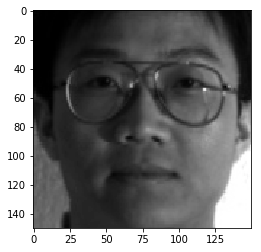

In [24]:
if len(incorrect_classified_indices):
    plt.imshow(X_test[incorrect_classified_indices[0]].reshape(150,150),cmap='gray')
    print('predicted value: ',predicted_classes[incorrect_classified_indices[0]])
    print('actual value: ',y_test[incorrect_classified_indices[0]])
else:
    print('No misclassified images to display')